In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [5]:
#y = data_df[y_cols_1+y_cols_2]

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [9]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-06-07 14:08:07.994131: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [11]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [12]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [13]:
mu_neg = np.log(50)
mu_pos = np.log(70000)

# log10 variances
# sigma_neg = 1/3.
# sigma_pos = 1/3.

sigma_neg = 1.0
sigma_pos = 1.0

# mu_neg = 10.
# mu_pos = 3.

# sigma_neg = 1.5
# sigma_pos = 1.5



In [14]:
mu_pos, mu_neg

(11.156250521031495, 3.912023005428146)

In [15]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [16]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [17]:
#cs = np.array(cs)*(10**3)
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]

In [18]:
#cs = np.arange(0.1,1,0.06)/1000
#cs = np.arange(0.01,1,0.065)/1000

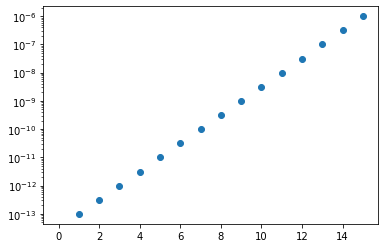

In [19]:
#cs = np.array(cs)*(10**(9))
#cs = np.array(cs)*(10**(3))
#np.log(np.array(cs)+(1e-15))
#cs = np.array(cs)*(10**13)
plt.plot(cs,'o')
plt.yscale('log')

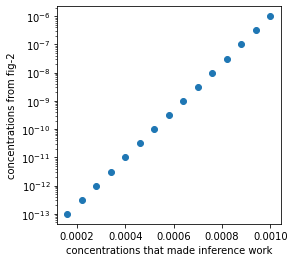

In [20]:

#cs = [0,10**(-6)]

# this numerical range appears to work appears 
#cs = np.arange(0.1,1,0.06)/1000
plt.figure(figsize=(4,4))

for factor in [100]:
    plt.plot(np.arange(0.1,1,0.06)[1:]/1000,cs[1:],'o',label=str(factor))
#plt.plot(np.arange(0.1,1,0.06)/1000,np.log(np.array(cs)+(1e-13)),'o',label=str(factor))
plt.xlabel('concentrations that made inference work')
plt.ylabel('concentrations from fig-2')
plt.yscale('log')
#plt.legend()

In [21]:
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]

In [22]:
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]

In [23]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         #c=cs[16-1-mp_idx],
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [24]:
#mp_list

In [25]:
# TiteSeq_mp_1 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[0:4],
#                                                          c=0,
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

# TiteSeq_mp_2 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4:8],
#                                                          c=10**(-6),
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

In [26]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [27]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [28]:
#y_train[y_cols_2]

In [29]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 19.8% for validation.
Data shuffled.
Time to set data: 36.7 sec.


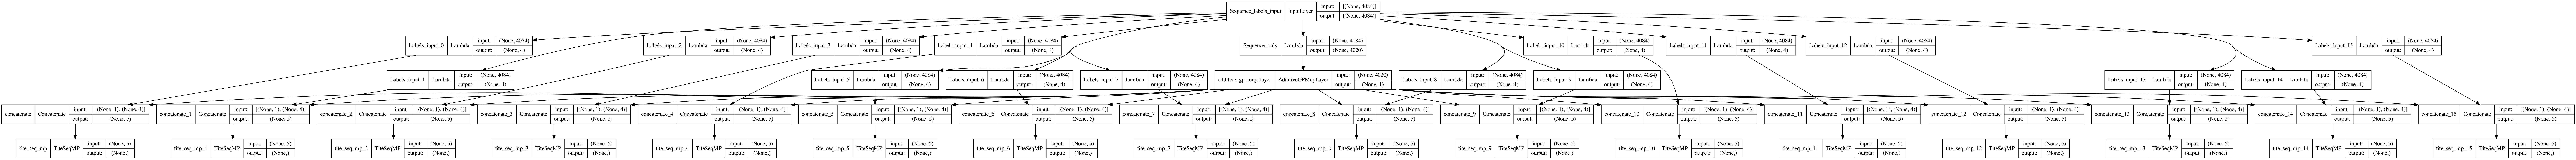

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [31]:

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=200,
          batch_size=300,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/200
444/444 [==============================] - 31s 35ms/step - loss: 14457633.0000 - tite_seq_mp_loss: 1392354.5000 - tite_seq_mp_1_loss: 1322581.3750 - tite_seq_mp_2_loss: 1360203.8750 - tite_seq_mp_3_loss: 1996752.8750 - tite_seq_mp_4_loss: 1368377.6250 - tite_seq_mp_5_loss: 1388223.1250 - tite_seq_mp_6_loss: 1503093.3750 - tite_seq_mp_7_loss: 1059473.8750 - tite_seq_mp_8_loss: 878848.0625 - tite_seq_mp_9_loss: 498691.8750 - tite_seq_mp_10_loss: 213112.7812 - tite_seq_mp_11_loss: 426863.5625 - tite_seq_mp_12_loss: 266894.1875 - tite_seq_mp_13_loss: 226671.1406 - tite_seq_mp_14_loss: 223615.2812 - tite_seq_mp_15_loss: 331874.6250 - I_var: -9.2762 - val_loss: 14566133.0000 - val_tite_seq_mp_loss: 1392402.2500 - val_tite_seq_mp_1_loss: 1317444.5000 - val_tite_seq_mp_2_loss: 1352033.3750 - val_tite_seq_mp_3_loss: 2026131.2500 - val_tite_seq_mp_4_loss: 1364414.6250 - val_tite_seq_mp_5_loss: 1403067.5000 - val_tite_seq_mp_6_loss: 1560415.3750 - val_tite_seq_mp_7_loss: 1071180.3750 

444/444 [==============================] - 6s 13ms/step - loss: 14421231.0000 - tite_seq_mp_loss: 1390543.8750 - tite_seq_mp_1_loss: 1320838.8750 - tite_seq_mp_2_loss: 1358281.0000 - tite_seq_mp_3_loss: 1994821.7500 - tite_seq_mp_4_loss: 1366868.8750 - tite_seq_mp_5_loss: 1386789.5000 - tite_seq_mp_6_loss: 1501274.1250 - tite_seq_mp_7_loss: 1057240.0000 - tite_seq_mp_8_loss: 875933.2500 - tite_seq_mp_9_loss: 494546.7500 - tite_seq_mp_10_loss: 207799.2656 - tite_seq_mp_11_loss: 422771.5312 - tite_seq_mp_12_loss: 265072.4688 - tite_seq_mp_13_loss: 225404.4844 - tite_seq_mp_14_loss: 222409.4531 - tite_seq_mp_15_loss: 330632.3125 - I_var: -9.2520 - val_loss: 14525387.0000 - val_tite_seq_mp_loss: 1390444.2500 - val_tite_seq_mp_1_loss: 1315591.7500 - val_tite_seq_mp_2_loss: 1349932.0000 - val_tite_seq_mp_3_loss: 2024086.5000 - val_tite_seq_mp_4_loss: 1362807.5000 - val_tite_seq_mp_5_loss: 1401650.6250 - val_tite_seq_mp_6_loss: 1558475.3750 - val_tite_seq_mp_7_loss: 1068695.3750 - val_tite_se

444/444 [==============================] - 6s 12ms/step - loss: 13909566.0000 - tite_seq_mp_loss: 1381662.7500 - tite_seq_mp_1_loss: 1291391.7500 - tite_seq_mp_2_loss: 1295625.0000 - tite_seq_mp_3_loss: 1987664.6250 - tite_seq_mp_4_loss: 1354962.2500 - tite_seq_mp_5_loss: 1382060.5000 - tite_seq_mp_6_loss: 1494914.3750 - tite_seq_mp_7_loss: 1048789.0000 - tite_seq_mp_8_loss: 864950.1250 - tite_seq_mp_9_loss: 479007.1875 - tite_seq_mp_10_loss: 184899.1719 - tite_seq_mp_11_loss: 330079.0938 - tite_seq_mp_12_loss: 224985.1562 - tite_seq_mp_13_loss: 158979.8750 - tite_seq_mp_14_loss: 172687.4531 - tite_seq_mp_15_loss: 256913.4219 - I_var: -6.9734 - val_loss: 13745825.0000 - val_tite_seq_mp_loss: 1381074.6250 - val_tite_seq_mp_1_loss: 1298532.2500 - val_tite_seq_mp_2_loss: 1342382.7500 - val_tite_seq_mp_3_loss: 2016821.8750 - val_tite_seq_mp_4_loss: 1356887.0000 - val_tite_seq_mp_5_loss: 1396867.1250 - val_tite_seq_mp_6_loss: 1551791.3750 - val_tite_seq_mp_7_loss: 1059589.0000 - val_tite_se

444/444 [==============================] - 5s 11ms/step - loss: 9723419.0000 - tite_seq_mp_loss: 1141294.3750 - tite_seq_mp_1_loss: 1056868.7500 - tite_seq_mp_2_loss: 1077676.0000 - tite_seq_mp_3_loss: 1103513.5000 - tite_seq_mp_4_loss: 1100923.8750 - tite_seq_mp_5_loss: 1095414.0000 - tite_seq_mp_6_loss: 1195730.3750 - tite_seq_mp_7_loss: 722019.6250 - tite_seq_mp_8_loss: 396833.5625 - tite_seq_mp_9_loss: 129861.3828 - tite_seq_mp_10_loss: 119566.3828 - tite_seq_mp_11_loss: 200556.1719 - tite_seq_mp_12_loss: 111494.2656 - tite_seq_mp_13_loss: 61823.3789 - tite_seq_mp_14_loss: 92224.7422 - tite_seq_mp_15_loss: 117620.1016 - I_var: -2.6437 - val_loss: 9781100.0000 - val_tite_seq_mp_loss: 1148745.2500 - val_tite_seq_mp_1_loss: 1062889.5000 - val_tite_seq_mp_2_loss: 1081276.3750 - val_tite_seq_mp_3_loss: 1109194.3750 - val_tite_seq_mp_4_loss: 1110021.3750 - val_tite_seq_mp_5_loss: 1105049.0000 - val_tite_seq_mp_6_loss: 1241058.7500 - val_tite_seq_mp_7_loss: 728231.0000 - val_tite_seq_mp_8

444/444 [==============================] - 5s 11ms/step - loss: 9369374.0000 - tite_seq_mp_loss: 1124319.2500 - tite_seq_mp_1_loss: 1031908.6875 - tite_seq_mp_2_loss: 1054987.2500 - tite_seq_mp_3_loss: 1019905.2500 - tite_seq_mp_4_loss: 1074476.8750 - tite_seq_mp_5_loss: 1049750.5000 - tite_seq_mp_6_loss: 1174725.6250 - tite_seq_mp_7_loss: 694781.5000 - tite_seq_mp_8_loss: 358808.0312 - tite_seq_mp_9_loss: 107019.1562 - tite_seq_mp_10_loss: 117732.4609 - tite_seq_mp_11_loss: 196552.5781 - tite_seq_mp_12_loss: 107539.4375 - tite_seq_mp_13_loss: 57829.8945 - tite_seq_mp_14_loss: 88812.7188 - tite_seq_mp_15_loss: 110225.8516 - I_var: -2.4087 - val_loss: 9473333.0000 - val_tite_seq_mp_loss: 1134782.8750 - val_tite_seq_mp_1_loss: 1041869.0000 - val_tite_seq_mp_2_loss: 1062675.2500 - val_tite_seq_mp_3_loss: 1033517.4375 - val_tite_seq_mp_4_loss: 1088053.3750 - val_tite_seq_mp_5_loss: 1063105.0000 - val_tite_seq_mp_6_loss: 1222122.3750 - val_tite_seq_mp_7_loss: 704222.1875 - val_tite_seq_mp_8

444/444 [==============================] - 6s 13ms/step - loss: 9339473.0000 - tite_seq_mp_loss: 1123110.7500 - tite_seq_mp_1_loss: 1029371.7500 - tite_seq_mp_2_loss: 1053161.6250 - tite_seq_mp_3_loss: 1009614.2500 - tite_seq_mp_4_loss: 1072170.0000 - tite_seq_mp_5_loss: 1045156.5625 - tite_seq_mp_6_loss: 1173497.8750 - tite_seq_mp_7_loss: 693295.9375 - tite_seq_mp_8_loss: 355909.5312 - tite_seq_mp_9_loss: 105687.5625 - tite_seq_mp_10_loss: 117448.2109 - tite_seq_mp_11_loss: 196393.9531 - tite_seq_mp_12_loss: 107519.4766 - tite_seq_mp_13_loss: 57815.3398 - tite_seq_mp_14_loss: 88949.7656 - tite_seq_mp_15_loss: 110373.7969 - I_var: -2.4045 - val_loss: 9446048.0000 - val_tite_seq_mp_loss: 1133493.3750 - val_tite_seq_mp_1_loss: 1039558.6875 - val_tite_seq_mp_2_loss: 1060897.1250 - val_tite_seq_mp_3_loss: 1027480.2500 - val_tite_seq_mp_4_loss: 1085867.7500 - val_tite_seq_mp_5_loss: 1058781.7500 - val_tite_seq_mp_6_loss: 1220527.0000 - val_tite_seq_mp_7_loss: 702264.8750 - val_tite_seq_mp_8

444/444 [==============================] - 5s 12ms/step - loss: 8576505.0000 - tite_seq_mp_loss: 1118350.5000 - tite_seq_mp_1_loss: 1024281.9375 - tite_seq_mp_2_loss: 1047946.6875 - tite_seq_mp_3_loss: 314386.8438 - tite_seq_mp_4_loss: 1065982.5000 - tite_seq_mp_5_loss: 1037950.6250 - tite_seq_mp_6_loss: 1166281.6250 - tite_seq_mp_7_loss: 684593.7500 - tite_seq_mp_8_loss: 344902.6250 - tite_seq_mp_9_loss: 95632.7500 - tite_seq_mp_10_loss: 115236.5703 - tite_seq_mp_11_loss: 195300.4062 - tite_seq_mp_12_loss: 107525.5234 - tite_seq_mp_13_loss: 57593.5547 - tite_seq_mp_14_loss: 89409.1094 - tite_seq_mp_15_loss: 111126.8438 - I_var: -2.4386 - val_loss: 8662707.0000 - val_tite_seq_mp_loss: 1129279.6250 - val_tite_seq_mp_1_loss: 1035070.6875 - val_tite_seq_mp_2_loss: 1056357.7500 - val_tite_seq_mp_3_loss: 305344.5938 - val_tite_seq_mp_4_loss: 1080502.8750 - val_tite_seq_mp_5_loss: 1052046.1250 - val_tite_seq_mp_6_loss: 1213533.5000 - val_tite_seq_mp_7_loss: 693936.3125 - val_tite_seq_mp_8_lo

444/444 [==============================] - 6s 13ms/step - loss: 7640211.5000 - tite_seq_mp_loss: 973265.9375 - tite_seq_mp_1_loss: 808434.1250 - tite_seq_mp_2_loss: 655661.0000 - tite_seq_mp_3_loss: 259976.5156 - tite_seq_mp_4_loss: 1044412.1250 - tite_seq_mp_5_loss: 976126.7500 - tite_seq_mp_6_loss: 1149572.8750 - tite_seq_mp_7_loss: 672480.7500 - tite_seq_mp_8_loss: 333935.8438 - tite_seq_mp_9_loss: 88430.5625 - tite_seq_mp_10_loss: 114095.0156 - tite_seq_mp_11_loss: 195927.2656 - tite_seq_mp_12_loss: 108159.0781 - tite_seq_mp_13_loss: 58118.0703 - tite_seq_mp_14_loss: 89929.3516 - tite_seq_mp_15_loss: 111688.9766 - I_var: -2.4541 - val_loss: 6503375.0000 - val_tite_seq_mp_loss: 651234.1875 - val_tite_seq_mp_1_loss: 541938.9375 - val_tite_seq_mp_2_loss: 327097.1250 - val_tite_seq_mp_3_loss: 255755.4688 - val_tite_seq_mp_4_loss: 1004603.6875 - val_tite_seq_mp_5_loss: 811004.6875 - val_tite_seq_mp_6_loss: 1160128.5000 - val_tite_seq_mp_7_loss: 672931.3750 - val_tite_seq_mp_8_loss: 3321

444/444 [==============================] - 5s 11ms/step - loss: 2993556.7500 - tite_seq_mp_loss: 208032.3125 - tite_seq_mp_1_loss: 200170.7656 - tite_seq_mp_2_loss: 207898.4219 - tite_seq_mp_3_loss: 223833.3281 - tite_seq_mp_4_loss: 252246.9688 - tite_seq_mp_5_loss: 244123.7188 - tite_seq_mp_6_loss: 320620.0000 - tite_seq_mp_7_loss: 291792.0312 - tite_seq_mp_8_loss: 275527.4688 - tite_seq_mp_9_loss: 84637.9297 - tite_seq_mp_10_loss: 114199.2266 - tite_seq_mp_11_loss: 199443.8438 - tite_seq_mp_12_loss: 109322.9062 - tite_seq_mp_13_loss: 59166.6602 - tite_seq_mp_14_loss: 90320.0625 - tite_seq_mp_15_loss: 112220.1484 - I_var: -2.4731 - val_loss: 2861090.5000 - val_tite_seq_mp_loss: 199727.6562 - val_tite_seq_mp_1_loss: 191375.4844 - val_tite_seq_mp_2_loss: 201150.9375 - val_tite_seq_mp_3_loss: 218949.2344 - val_tite_seq_mp_4_loss: 242311.7188 - val_tite_seq_mp_5_loss: 237158.1562 - val_tite_seq_mp_6_loss: 310777.3750 - val_tite_seq_mp_7_loss: 242956.6406 - val_tite_seq_mp_8_loss: 266391.9

444/444 [==============================] - 5s 11ms/step - loss: 2427663.7500 - tite_seq_mp_loss: 162871.6094 - tite_seq_mp_1_loss: 157549.4688 - tite_seq_mp_2_loss: 180676.6094 - tite_seq_mp_3_loss: 188855.4531 - tite_seq_mp_4_loss: 189325.5625 - tite_seq_mp_5_loss: 199624.2031 - tite_seq_mp_6_loss: 233371.9062 - tite_seq_mp_7_loss: 194270.2188 - tite_seq_mp_8_loss: 143959.0938 - tite_seq_mp_9_loss: 78055.8750 - tite_seq_mp_10_loss: 114511.6719 - tite_seq_mp_11_loss: 205221.3125 - tite_seq_mp_12_loss: 111680.4141 - tite_seq_mp_13_loss: 61361.5977 - tite_seq_mp_14_loss: 92053.0234 - tite_seq_mp_15_loss: 114274.4766 - I_var: -2.5352 - val_loss: 2359910.7500 - val_tite_seq_mp_loss: 155604.1406 - val_tite_seq_mp_1_loss: 152035.0469 - val_tite_seq_mp_2_loss: 172640.8438 - val_tite_seq_mp_3_loss: 184436.8750 - val_tite_seq_mp_4_loss: 183866.4531 - val_tite_seq_mp_5_loss: 192647.3750 - val_tite_seq_mp_6_loss: 228330.6250 - val_tite_seq_mp_7_loss: 189301.0312 - val_tite_seq_mp_8_loss: 141024.1

444/444 [==============================] - 5s 11ms/step - loss: 2214056.2500 - tite_seq_mp_loss: 137866.4219 - tite_seq_mp_1_loss: 136171.0469 - tite_seq_mp_2_loss: 160441.5000 - tite_seq_mp_3_loss: 164705.3594 - tite_seq_mp_4_loss: 159890.4688 - tite_seq_mp_5_loss: 173530.7031 - tite_seq_mp_6_loss: 200256.9219 - tite_seq_mp_7_loss: 169229.5938 - tite_seq_mp_8_loss: 129181.3984 - tite_seq_mp_9_loss: 73890.1016 - tite_seq_mp_10_loss: 115128.4062 - tite_seq_mp_11_loss: 209618.3906 - tite_seq_mp_12_loss: 113023.4141 - tite_seq_mp_13_loss: 62767.8906 - tite_seq_mp_14_loss: 92694.8359 - tite_seq_mp_15_loss: 115655.1094 - I_var: -2.5678 - val_loss: 2162372.7500 - val_tite_seq_mp_loss: 133041.0938 - val_tite_seq_mp_1_loss: 131180.5156 - val_tite_seq_mp_2_loss: 153397.8281 - val_tite_seq_mp_3_loss: 162882.8438 - val_tite_seq_mp_4_loss: 155765.9062 - val_tite_seq_mp_5_loss: 169379.3750 - val_tite_seq_mp_6_loss: 195352.8281 - val_tite_seq_mp_7_loss: 166198.5156 - val_tite_seq_mp_8_loss: 128458.5

444/444 [==============================] - 6s 13ms/step - loss: 2091184.1250 - tite_seq_mp_loss: 125187.7266 - tite_seq_mp_1_loss: 123533.4688 - tite_seq_mp_2_loss: 149131.6250 - tite_seq_mp_3_loss: 151302.0156 - tite_seq_mp_4_loss: 145041.8125 - tite_seq_mp_5_loss: 157724.8281 - tite_seq_mp_6_loss: 181241.7344 - tite_seq_mp_7_loss: 154195.5625 - tite_seq_mp_8_loss: 120245.0234 - tite_seq_mp_9_loss: 70875.2031 - tite_seq_mp_10_loss: 115444.5781 - tite_seq_mp_11_loss: 211935.8125 - tite_seq_mp_12_loss: 113364.2500 - tite_seq_mp_13_loss: 63176.8086 - tite_seq_mp_14_loss: 92873.6719 - tite_seq_mp_15_loss: 115906.0781 - I_var: -2.5724 - val_loss: 2043482.5000 - val_tite_seq_mp_loss: 121613.2812 - val_tite_seq_mp_1_loss: 119850.3047 - val_tite_seq_mp_2_loss: 143249.1875 - val_tite_seq_mp_3_loss: 149489.3125 - val_tite_seq_mp_4_loss: 140252.9531 - val_tite_seq_mp_5_loss: 154432.4688 - val_tite_seq_mp_6_loss: 178617.3438 - val_tite_seq_mp_7_loss: 150916.3125 - val_tite_seq_mp_8_loss: 119314.5

444/444 [==============================] - 5s 12ms/step - loss: 2001642.5000 - tite_seq_mp_loss: 116899.4766 - tite_seq_mp_1_loss: 116010.3828 - tite_seq_mp_2_loss: 140356.0625 - tite_seq_mp_3_loss: 140862.5312 - tite_seq_mp_4_loss: 134277.7812 - tite_seq_mp_5_loss: 145796.0000 - tite_seq_mp_6_loss: 168305.6094 - tite_seq_mp_7_loss: 143582.6250 - tite_seq_mp_8_loss: 114084.5547 - tite_seq_mp_9_loss: 68889.0000 - tite_seq_mp_10_loss: 115637.9531 - tite_seq_mp_11_loss: 212815.2031 - tite_seq_mp_12_loss: 113050.6172 - tite_seq_mp_13_loss: 63045.5273 - tite_seq_mp_14_loss: 92710.4766 - tite_seq_mp_15_loss: 115313.8047 - I_var: -2.5393 - val_loss: 1959559.3750 - val_tite_seq_mp_loss: 113556.9766 - val_tite_seq_mp_1_loss: 112135.5469 - val_tite_seq_mp_2_loss: 135802.6875 - val_tite_seq_mp_3_loss: 140236.1562 - val_tite_seq_mp_4_loss: 130072.2891 - val_tite_seq_mp_5_loss: 144142.8594 - val_tite_seq_mp_6_loss: 165429.8906 - val_tite_seq_mp_7_loss: 141422.0000 - val_tite_seq_mp_8_loss: 113854.1

444/444 [==============================] - 5s 12ms/step - loss: 1946650.2500 - tite_seq_mp_loss: 113193.7266 - tite_seq_mp_1_loss: 111157.7422 - tite_seq_mp_2_loss: 135228.7344 - tite_seq_mp_3_loss: 135910.5156 - tite_seq_mp_4_loss: 127561.5312 - tite_seq_mp_5_loss: 138570.7656 - tite_seq_mp_6_loss: 159845.7188 - tite_seq_mp_7_loss: 136035.2969 - tite_seq_mp_8_loss: 110144.9141 - tite_seq_mp_9_loss: 67562.1719 - tite_seq_mp_10_loss: 115796.8828 - tite_seq_mp_11_loss: 213483.3594 - tite_seq_mp_12_loss: 112379.8203 - tite_seq_mp_13_loss: 62378.3984 - tite_seq_mp_14_loss: 92307.8203 - tite_seq_mp_15_loss: 115087.0391 - I_var: -2.5318 - val_loss: 1902025.1250 - val_tite_seq_mp_loss: 108045.8906 - val_tite_seq_mp_1_loss: 107722.2188 - val_tite_seq_mp_2_loss: 130856.7812 - val_tite_seq_mp_3_loss: 133849.6562 - val_tite_seq_mp_4_loss: 123115.6250 - val_tite_seq_mp_5_loss: 136705.6719 - val_tite_seq_mp_6_loss: 156800.0938 - val_tite_seq_mp_7_loss: 134075.4219 - val_tite_seq_mp_8_loss: 109712.9

444/444 [==============================] - 5s 11ms/step - loss: 1900207.0000 - tite_seq_mp_loss: 107778.4766 - tite_seq_mp_1_loss: 107911.2109 - tite_seq_mp_2_loss: 133177.7812 - tite_seq_mp_3_loss: 128538.7188 - tite_seq_mp_4_loss: 121442.6797 - tite_seq_mp_5_loss: 133162.8281 - tite_seq_mp_6_loss: 153696.8438 - tite_seq_mp_7_loss: 131467.3594 - tite_seq_mp_8_loss: 107653.2422 - tite_seq_mp_9_loss: 66891.9688 - tite_seq_mp_10_loss: 115993.1562 - tite_seq_mp_11_loss: 212031.0625 - tite_seq_mp_12_loss: 111816.3203 - tite_seq_mp_13_loss: 62053.6445 - tite_seq_mp_14_loss: 91905.4297 - tite_seq_mp_15_loss: 114679.4219 - I_var: -2.5593 - val_loss: 1858695.8750 - val_tite_seq_mp_loss: 104878.1797 - val_tite_seq_mp_1_loss: 104234.0156 - val_tite_seq_mp_2_loss: 126609.4219 - val_tite_seq_mp_3_loss: 128599.2500 - val_tite_seq_mp_4_loss: 118409.3828 - val_tite_seq_mp_5_loss: 131365.0781 - val_tite_seq_mp_6_loss: 150365.9062 - val_tite_seq_mp_7_loss: 128200.3672 - val_tite_seq_mp_8_loss: 107159.9

444/444 [==============================] - 6s 12ms/step - loss: 1865996.8750 - tite_seq_mp_loss: 105197.1172 - tite_seq_mp_1_loss: 105378.2344 - tite_seq_mp_2_loss: 128976.1719 - tite_seq_mp_3_loss: 125698.5859 - tite_seq_mp_4_loss: 118687.2812 - tite_seq_mp_5_loss: 130123.2578 - tite_seq_mp_6_loss: 148341.2812 - tite_seq_mp_7_loss: 125490.1328 - tite_seq_mp_8_loss: 105091.2969 - tite_seq_mp_9_loss: 66094.5703 - tite_seq_mp_10_loss: 116165.6797 - tite_seq_mp_11_loss: 211888.1094 - tite_seq_mp_12_loss: 111476.3906 - tite_seq_mp_13_loss: 61698.9609 - tite_seq_mp_14_loss: 91507.7031 - tite_seq_mp_15_loss: 114175.2969 - I_var: -2.5257 - val_loss: 1836102.5000 - val_tite_seq_mp_loss: 104027.2812 - val_tite_seq_mp_1_loss: 102911.4141 - val_tite_seq_mp_2_loss: 126886.2188 - val_tite_seq_mp_3_loss: 125930.2344 - val_tite_seq_mp_4_loss: 116102.5078 - val_tite_seq_mp_5_loss: 129615.5547 - val_tite_seq_mp_6_loss: 149497.7969 - val_tite_seq_mp_7_loss: 125195.8906 - val_tite_seq_mp_8_loss: 105930.8

444/444 [==============================] - 5s 12ms/step - loss: 1837068.5000 - tite_seq_mp_loss: 103134.1562 - tite_seq_mp_1_loss: 103322.1016 - tite_seq_mp_2_loss: 127401.6250 - tite_seq_mp_3_loss: 123396.4141 - tite_seq_mp_4_loss: 115620.1641 - tite_seq_mp_5_loss: 125275.2891 - tite_seq_mp_6_loss: 144116.3125 - tite_seq_mp_7_loss: 121648.2969 - tite_seq_mp_8_loss: 103144.7578 - tite_seq_mp_9_loss: 65213.8164 - tite_seq_mp_10_loss: 116214.6875 - tite_seq_mp_11_loss: 210855.9375 - tite_seq_mp_12_loss: 111166.6562 - tite_seq_mp_13_loss: 61436.6406 - tite_seq_mp_14_loss: 91342.0469 - tite_seq_mp_15_loss: 113771.2500 - I_var: -2.5181 - val_loss: 1792382.2500 - val_tite_seq_mp_loss: 99710.1250 - val_tite_seq_mp_1_loss: 99478.5547 - val_tite_seq_mp_2_loss: 122803.9922 - val_tite_seq_mp_3_loss: 121485.2734 - val_tite_seq_mp_4_loss: 111258.2734 - val_tite_seq_mp_5_loss: 123080.1094 - val_tite_seq_mp_6_loss: 140414.8906 - val_tite_seq_mp_7_loss: 119359.9609 - val_tite_seq_mp_8_loss: 102580.023

444/444 [==============================] - 5s 12ms/step - loss: 1808759.3750 - tite_seq_mp_loss: 101148.8359 - tite_seq_mp_1_loss: 101153.5312 - tite_seq_mp_2_loss: 125300.2812 - tite_seq_mp_3_loss: 120236.8750 - tite_seq_mp_4_loss: 111655.4531 - tite_seq_mp_5_loss: 121887.7734 - tite_seq_mp_6_loss: 139842.8906 - tite_seq_mp_7_loss: 118580.9688 - tite_seq_mp_8_loss: 101289.2344 - tite_seq_mp_9_loss: 65039.6016 - tite_seq_mp_10_loss: 116420.6875 - tite_seq_mp_11_loss: 209655.1719 - tite_seq_mp_12_loss: 110804.2344 - tite_seq_mp_13_loss: 61214.2812 - tite_seq_mp_14_loss: 91190.5391 - tite_seq_mp_15_loss: 113329.8672 - I_var: -2.5101 - val_loss: 1766288.2500 - val_tite_seq_mp_loss: 98106.2969 - val_tite_seq_mp_1_loss: 97569.9453 - val_tite_seq_mp_2_loss: 121403.1250 - val_tite_seq_mp_3_loss: 119112.6719 - val_tite_seq_mp_4_loss: 108132.3281 - val_tite_seq_mp_5_loss: 119626.5156 - val_tite_seq_mp_6_loss: 137594.6406 - val_tite_seq_mp_7_loss: 115816.3203 - val_tite_seq_mp_8_loss: 101045.476

444/444 [==============================] - 6s 12ms/step - loss: 1789642.3750 - tite_seq_mp_loss: 99689.1484 - tite_seq_mp_1_loss: 100328.6875 - tite_seq_mp_2_loss: 124118.2500 - tite_seq_mp_3_loss: 117923.6484 - tite_seq_mp_4_loss: 109880.3672 - tite_seq_mp_5_loss: 119529.2344 - tite_seq_mp_6_loss: 137250.4062 - tite_seq_mp_7_loss: 115614.1406 - tite_seq_mp_8_loss: 99687.6797 - tite_seq_mp_9_loss: 64535.8516 - tite_seq_mp_10_loss: 116532.0938 - tite_seq_mp_11_loss: 208982.0469 - tite_seq_mp_12_loss: 110648.1250 - tite_seq_mp_13_loss: 61128.6797 - tite_seq_mp_14_loss: 90779.6719 - tite_seq_mp_15_loss: 113003.5391 - I_var: -2.4834 - val_loss: 1746130.1250 - val_tite_seq_mp_loss: 96541.7031 - val_tite_seq_mp_1_loss: 96107.1094 - val_tite_seq_mp_2_loss: 119899.4688 - val_tite_seq_mp_3_loss: 116990.9297 - val_tite_seq_mp_4_loss: 106159.4219 - val_tite_seq_mp_5_loss: 117340.0469 - val_tite_seq_mp_6_loss: 134460.4062 - val_tite_seq_mp_7_loss: 113363.0000 - val_tite_seq_mp_8_loss: 99714.8984 -

444/444 [==============================] - 5s 12ms/step - loss: 1774754.1250 - tite_seq_mp_loss: 98603.1875 - tite_seq_mp_1_loss: 99068.4531 - tite_seq_mp_2_loss: 123176.9219 - tite_seq_mp_3_loss: 116425.6094 - tite_seq_mp_4_loss: 108428.5078 - tite_seq_mp_5_loss: 117524.0547 - tite_seq_mp_6_loss: 134908.4688 - tite_seq_mp_7_loss: 113838.8516 - tite_seq_mp_8_loss: 98790.3828 - tite_seq_mp_9_loss: 64487.5391 - tite_seq_mp_10_loss: 116716.0078 - tite_seq_mp_11_loss: 207946.9531 - tite_seq_mp_12_loss: 110439.0938 - tite_seq_mp_13_loss: 60966.2070 - tite_seq_mp_14_loss: 90708.6484 - tite_seq_mp_15_loss: 112713.7422 - I_var: -2.4911 - val_loss: 1729676.6250 - val_tite_seq_mp_loss: 95728.8125 - val_tite_seq_mp_1_loss: 95365.0625 - val_tite_seq_mp_2_loss: 118924.2812 - val_tite_seq_mp_3_loss: 115425.9141 - val_tite_seq_mp_4_loss: 104329.2891 - val_tite_seq_mp_5_loss: 115156.2500 - val_tite_seq_mp_6_loss: 131989.7656 - val_tite_seq_mp_7_loss: 111294.5391 - val_tite_seq_mp_8_loss: 98265.1719 - 

444/444 [==============================] - 6s 13ms/step - loss: 1761226.2500 - tite_seq_mp_loss: 97792.2969 - tite_seq_mp_1_loss: 98553.4375 - tite_seq_mp_2_loss: 122038.4766 - tite_seq_mp_3_loss: 115244.6094 - tite_seq_mp_4_loss: 106814.8750 - tite_seq_mp_5_loss: 115491.4453 - tite_seq_mp_6_loss: 132521.2812 - tite_seq_mp_7_loss: 112606.2656 - tite_seq_mp_8_loss: 97312.0312 - tite_seq_mp_9_loss: 64259.1719 - tite_seq_mp_10_loss: 116844.9688 - tite_seq_mp_11_loss: 207654.8125 - tite_seq_mp_12_loss: 110114.8516 - tite_seq_mp_13_loss: 60941.8750 - tite_seq_mp_14_loss: 90436.6641 - tite_seq_mp_15_loss: 112586.9609 - I_var: -2.4770 - val_loss: 1717314.8750 - val_tite_seq_mp_loss: 94847.5391 - val_tite_seq_mp_1_loss: 94362.8828 - val_tite_seq_mp_2_loss: 118514.1797 - val_tite_seq_mp_3_loss: 114402.8828 - val_tite_seq_mp_4_loss: 102964.3281 - val_tite_seq_mp_5_loss: 113361.4453 - val_tite_seq_mp_6_loss: 130233.1250 - val_tite_seq_mp_7_loss: 109118.1953 - val_tite_seq_mp_8_loss: 97221.2422 - 

444/444 [==============================] - 5s 12ms/step - loss: 1746285.7500 - tite_seq_mp_loss: 96504.5312 - tite_seq_mp_1_loss: 97751.8516 - tite_seq_mp_2_loss: 121909.2188 - tite_seq_mp_3_loss: 114073.1250 - tite_seq_mp_4_loss: 105558.1172 - tite_seq_mp_5_loss: 114083.2969 - tite_seq_mp_6_loss: 129150.4766 - tite_seq_mp_7_loss: 109660.1797 - tite_seq_mp_8_loss: 96351.1406 - tite_seq_mp_9_loss: 63995.0078 - tite_seq_mp_10_loss: 116963.5547 - tite_seq_mp_11_loss: 206787.4844 - tite_seq_mp_12_loss: 109986.3984 - tite_seq_mp_13_loss: 60768.3008 - tite_seq_mp_14_loss: 90315.6016 - tite_seq_mp_15_loss: 112415.0547 - I_var: -2.4964 - val_loss: 1704798.7500 - val_tite_seq_mp_loss: 94399.0859 - val_tite_seq_mp_1_loss: 93832.1328 - val_tite_seq_mp_2_loss: 117650.3594 - val_tite_seq_mp_3_loss: 113796.8203 - val_tite_seq_mp_4_loss: 101735.8281 - val_tite_seq_mp_5_loss: 111570.7344 - val_tite_seq_mp_6_loss: 128266.4062 - val_tite_seq_mp_7_loss: 106854.0234 - val_tite_seq_mp_8_loss: 96361.7891 - 

444/444 [==============================] - 6s 12ms/step - loss: 1736839.2500 - tite_seq_mp_loss: 95892.0000 - tite_seq_mp_1_loss: 97008.5078 - tite_seq_mp_2_loss: 121081.6406 - tite_seq_mp_3_loss: 113317.1328 - tite_seq_mp_4_loss: 104567.7734 - tite_seq_mp_5_loss: 112369.7266 - tite_seq_mp_6_loss: 128772.9766 - tite_seq_mp_7_loss: 108357.0469 - tite_seq_mp_8_loss: 95279.4766 - tite_seq_mp_9_loss: 63850.5039 - tite_seq_mp_10_loss: 117076.5781 - tite_seq_mp_11_loss: 206624.9844 - tite_seq_mp_12_loss: 109637.6328 - tite_seq_mp_13_loss: 60487.9414 - tite_seq_mp_14_loss: 90270.2812 - tite_seq_mp_15_loss: 112232.1797 - I_var: -2.4735 - val_loss: 1734439.3750 - val_tite_seq_mp_loss: 96933.9688 - val_tite_seq_mp_1_loss: 97441.4688 - val_tite_seq_mp_2_loss: 119440.6953 - val_tite_seq_mp_3_loss: 117564.1484 - val_tite_seq_mp_4_loss: 105223.0938 - val_tite_seq_mp_5_loss: 114377.5312 - val_tite_seq_mp_6_loss: 130307.5625 - val_tite_seq_mp_7_loss: 109887.3281 - val_tite_seq_mp_8_loss: 97568.1719 - 

444/444 [==============================] - 5s 11ms/step - loss: 1728963.0000 - tite_seq_mp_loss: 95318.2188 - tite_seq_mp_1_loss: 96707.2812 - tite_seq_mp_2_loss: 120646.9141 - tite_seq_mp_3_loss: 112599.2422 - tite_seq_mp_4_loss: 103676.1562 - tite_seq_mp_5_loss: 111139.9531 - tite_seq_mp_6_loss: 127448.5547 - tite_seq_mp_7_loss: 106971.2578 - tite_seq_mp_8_loss: 94754.4922 - tite_seq_mp_9_loss: 63885.2422 - tite_seq_mp_10_loss: 117236.8750 - tite_seq_mp_11_loss: 206832.3281 - tite_seq_mp_12_loss: 109482.5156 - tite_seq_mp_13_loss: 60284.3828 - tite_seq_mp_14_loss: 90116.9297 - tite_seq_mp_15_loss: 111849.2422 - I_var: -2.4467 - val_loss: 1685655.2500 - val_tite_seq_mp_loss: 92778.8281 - val_tite_seq_mp_1_loss: 92879.6953 - val_tite_seq_mp_2_loss: 116629.7734 - val_tite_seq_mp_3_loss: 112124.7734 - val_tite_seq_mp_4_loss: 99761.4062 - val_tite_seq_mp_5_loss: 109024.8828 - val_tite_seq_mp_6_loss: 125070.6016 - val_tite_seq_mp_7_loss: 104405.8125 - val_tite_seq_mp_8_loss: 94495.5781 - v

444/444 [==============================] - 5s 11ms/step - loss: 1723086.8750 - tite_seq_mp_loss: 95143.8438 - tite_seq_mp_1_loss: 96257.8125 - tite_seq_mp_2_loss: 120363.5859 - tite_seq_mp_3_loss: 112133.5781 - tite_seq_mp_4_loss: 102864.7266 - tite_seq_mp_5_loss: 110389.8906 - tite_seq_mp_6_loss: 126601.1406 - tite_seq_mp_7_loss: 106732.4922 - tite_seq_mp_8_loss: 93936.7578 - tite_seq_mp_9_loss: 63903.6523 - tite_seq_mp_10_loss: 117190.0391 - tite_seq_mp_11_loss: 206429.7969 - tite_seq_mp_12_loss: 109335.4609 - tite_seq_mp_13_loss: 60008.4805 - tite_seq_mp_14_loss: 89994.7344 - tite_seq_mp_15_loss: 111786.1953 - I_var: -2.4503 - val_loss: 1679693.1250 - val_tite_seq_mp_loss: 92462.2422 - val_tite_seq_mp_1_loss: 93026.7578 - val_tite_seq_mp_2_loss: 116480.0000 - val_tite_seq_mp_3_loss: 111726.1562 - val_tite_seq_mp_4_loss: 99267.6172 - val_tite_seq_mp_5_loss: 107832.7969 - val_tite_seq_mp_6_loss: 123904.9531 - val_tite_seq_mp_7_loss: 103011.6250 - val_tite_seq_mp_8_loss: 93519.9375 - v

444/444 [==============================] - 6s 13ms/step - loss: 1712932.5000 - tite_seq_mp_loss: 94400.1641 - tite_seq_mp_1_loss: 95843.5234 - tite_seq_mp_2_loss: 120007.2812 - tite_seq_mp_3_loss: 111606.8281 - tite_seq_mp_4_loss: 102171.8984 - tite_seq_mp_5_loss: 109372.1719 - tite_seq_mp_6_loss: 123922.4609 - tite_seq_mp_7_loss: 105024.8203 - tite_seq_mp_8_loss: 92941.2812 - tite_seq_mp_9_loss: 63701.2422 - tite_seq_mp_10_loss: 117434.5391 - tite_seq_mp_11_loss: 206065.0469 - tite_seq_mp_12_loss: 109105.4766 - tite_seq_mp_13_loss: 59823.6992 - tite_seq_mp_14_loss: 89926.8125 - tite_seq_mp_15_loss: 111570.5781 - I_var: -2.4474 - val_loss: 1677396.0000 - val_tite_seq_mp_loss: 92606.7188 - val_tite_seq_mp_1_loss: 93139.4609 - val_tite_seq_mp_2_loss: 116155.8359 - val_tite_seq_mp_3_loss: 111809.6172 - val_tite_seq_mp_4_loss: 99017.2812 - val_tite_seq_mp_5_loss: 107656.4141 - val_tite_seq_mp_6_loss: 122495.7891 - val_tite_seq_mp_7_loss: 102576.8984 - val_tite_seq_mp_8_loss: 92814.8281 - v

444/444 [==============================] - 6s 12ms/step - loss: 1708919.7500 - tite_seq_mp_loss: 93983.6562 - tite_seq_mp_1_loss: 95579.4219 - tite_seq_mp_2_loss: 119674.5469 - tite_seq_mp_3_loss: 111417.5234 - tite_seq_mp_4_loss: 101442.3984 - tite_seq_mp_5_loss: 108632.6406 - tite_seq_mp_6_loss: 124082.0469 - tite_seq_mp_7_loss: 104160.6172 - tite_seq_mp_8_loss: 92671.8047 - tite_seq_mp_9_loss: 63652.2578 - tite_seq_mp_10_loss: 117536.6250 - tite_seq_mp_11_loss: 205994.6562 - tite_seq_mp_12_loss: 108882.0078 - tite_seq_mp_13_loss: 59735.9102 - tite_seq_mp_14_loss: 89876.3359 - tite_seq_mp_15_loss: 111581.0625 - I_var: -2.4665 - val_loss: 1666823.0000 - val_tite_seq_mp_loss: 91893.5625 - val_tite_seq_mp_1_loss: 92207.0938 - val_tite_seq_mp_2_loss: 115658.1641 - val_tite_seq_mp_3_loss: 110782.0859 - val_tite_seq_mp_4_loss: 97927.6797 - val_tite_seq_mp_5_loss: 106292.0234 - val_tite_seq_mp_6_loss: 121967.7812 - val_tite_seq_mp_7_loss: 101238.2266 - val_tite_seq_mp_8_loss: 92231.0391 - v

444/444 [==============================] - 5s 12ms/step - loss: 1703333.1250 - tite_seq_mp_loss: 93564.8828 - tite_seq_mp_1_loss: 95210.0938 - tite_seq_mp_2_loss: 119457.4297 - tite_seq_mp_3_loss: 110917.4922 - tite_seq_mp_4_loss: 100953.9062 - tite_seq_mp_5_loss: 107891.8438 - tite_seq_mp_6_loss: 122671.3047 - tite_seq_mp_7_loss: 103937.8594 - tite_seq_mp_8_loss: 91972.0781 - tite_seq_mp_9_loss: 63741.9727 - tite_seq_mp_10_loss: 117701.3047 - tite_seq_mp_11_loss: 205789.7500 - tite_seq_mp_12_loss: 108786.0938 - tite_seq_mp_13_loss: 59549.4609 - tite_seq_mp_14_loss: 89826.6016 - tite_seq_mp_15_loss: 111344.8828 - I_var: -2.4767 - val_loss: 1662741.0000 - val_tite_seq_mp_loss: 91487.3047 - val_tite_seq_mp_1_loss: 91832.8828 - val_tite_seq_mp_2_loss: 115541.5312 - val_tite_seq_mp_3_loss: 110762.0859 - val_tite_seq_mp_4_loss: 97473.9375 - val_tite_seq_mp_5_loss: 105757.8516 - val_tite_seq_mp_6_loss: 121164.4531 - val_tite_seq_mp_7_loss: 100656.7891 - val_tite_seq_mp_8_loss: 91838.1484 - v

444/444 [==============================] - 5s 11ms/step - loss: 1699400.3750 - tite_seq_mp_loss: 93254.2734 - tite_seq_mp_1_loss: 94970.3984 - tite_seq_mp_2_loss: 119352.7188 - tite_seq_mp_3_loss: 110872.6797 - tite_seq_mp_4_loss: 100568.6875 - tite_seq_mp_5_loss: 107193.5703 - tite_seq_mp_6_loss: 121928.0312 - tite_seq_mp_7_loss: 103167.5234 - tite_seq_mp_8_loss: 91406.1016 - tite_seq_mp_9_loss: 63764.7188 - tite_seq_mp_10_loss: 117922.8203 - tite_seq_mp_11_loss: 205936.9688 - tite_seq_mp_12_loss: 108777.4219 - tite_seq_mp_13_loss: 59374.9141 - tite_seq_mp_14_loss: 89735.7109 - tite_seq_mp_15_loss: 111157.2656 - I_var: -2.4253 - val_loss: 1682541.7500 - val_tite_seq_mp_loss: 93643.9609 - val_tite_seq_mp_1_loss: 94435.6953 - val_tite_seq_mp_2_loss: 116869.0469 - val_tite_seq_mp_3_loss: 113618.2422 - val_tite_seq_mp_4_loss: 99615.1875 - val_tite_seq_mp_5_loss: 107603.4062 - val_tite_seq_mp_6_loss: 122584.9453 - val_tite_seq_mp_7_loss: 102405.9453 - val_tite_seq_mp_8_loss: 92445.1250 - v

444/444 [==============================] - 9s 21ms/step - loss: 1696872.5000 - tite_seq_mp_loss: 93182.4141 - tite_seq_mp_1_loss: 94650.8359 - tite_seq_mp_2_loss: 119329.2266 - tite_seq_mp_3_loss: 110635.9688 - tite_seq_mp_4_loss: 100198.1250 - tite_seq_mp_5_loss: 107456.8672 - tite_seq_mp_6_loss: 121451.5391 - tite_seq_mp_7_loss: 102979.4922 - tite_seq_mp_8_loss: 91064.6406 - tite_seq_mp_9_loss: 64030.3438 - tite_seq_mp_10_loss: 117944.5781 - tite_seq_mp_11_loss: 205442.3594 - tite_seq_mp_12_loss: 108673.3828 - tite_seq_mp_13_loss: 59037.8984 - tite_seq_mp_14_loss: 89701.8984 - tite_seq_mp_15_loss: 111074.4688 - I_var: -2.4386 - val_loss: 1656036.0000 - val_tite_seq_mp_loss: 91353.1953 - val_tite_seq_mp_1_loss: 91660.5938 - val_tite_seq_mp_2_loss: 115289.4375 - val_tite_seq_mp_3_loss: 110505.7031 - val_tite_seq_mp_4_loss: 96760.7656 - val_tite_seq_mp_5_loss: 104753.8516 - val_tite_seq_mp_6_loss: 119331.7891 - val_tite_seq_mp_7_loss: 99555.9688 - val_tite_seq_mp_8_loss: 90911.4688 - va

444/444 [==============================] - 5s 12ms/step - loss: 1693239.1250 - tite_seq_mp_loss: 92764.4219 - tite_seq_mp_1_loss: 94442.5781 - tite_seq_mp_2_loss: 119051.2734 - tite_seq_mp_3_loss: 110242.6094 - tite_seq_mp_4_loss: 99506.4297 - tite_seq_mp_5_loss: 106405.6016 - tite_seq_mp_6_loss: 122005.3594 - tite_seq_mp_7_loss: 102572.5859 - tite_seq_mp_8_loss: 91030.7266 - tite_seq_mp_9_loss: 64020.6484 - tite_seq_mp_10_loss: 118108.6016 - tite_seq_mp_11_loss: 204824.0000 - tite_seq_mp_12_loss: 108534.6406 - tite_seq_mp_13_loss: 59075.1016 - tite_seq_mp_14_loss: 89543.2109 - tite_seq_mp_15_loss: 111092.2578 - I_var: -2.4191 - val_loss: 1653307.0000 - val_tite_seq_mp_loss: 91023.0938 - val_tite_seq_mp_1_loss: 91723.4219 - val_tite_seq_mp_2_loss: 115058.9766 - val_tite_seq_mp_3_loss: 110557.7266 - val_tite_seq_mp_4_loss: 96207.2656 - val_tite_seq_mp_5_loss: 104309.1250 - val_tite_seq_mp_6_loss: 119488.8984 - val_tite_seq_mp_7_loss: 99003.5391 - val_tite_seq_mp_8_loss: 90456.5078 - val

444/444 [==============================] - 5s 12ms/step - loss: 1688984.0000 - tite_seq_mp_loss: 92592.1641 - tite_seq_mp_1_loss: 94504.3750 - tite_seq_mp_2_loss: 119002.6719 - tite_seq_mp_3_loss: 110181.9141 - tite_seq_mp_4_loss: 99256.4062 - tite_seq_mp_5_loss: 105828.6719 - tite_seq_mp_6_loss: 120675.6328 - tite_seq_mp_7_loss: 102258.9688 - tite_seq_mp_8_loss: 90337.3672 - tite_seq_mp_9_loss: 64124.6875 - tite_seq_mp_10_loss: 118205.7500 - tite_seq_mp_11_loss: 204175.3438 - tite_seq_mp_12_loss: 108554.7266 - tite_seq_mp_13_loss: 58824.0273 - tite_seq_mp_14_loss: 89509.6562 - tite_seq_mp_15_loss: 110932.0391 - I_var: -2.4113 - val_loss: 1649538.3750 - val_tite_seq_mp_loss: 91056.6797 - val_tite_seq_mp_1_loss: 91537.6875 - val_tite_seq_mp_2_loss: 114857.8203 - val_tite_seq_mp_3_loss: 110332.9219 - val_tite_seq_mp_4_loss: 95811.6250 - val_tite_seq_mp_5_loss: 104136.5703 - val_tite_seq_mp_6_loss: 118573.9609 - val_tite_seq_mp_7_loss: 98846.0938 - val_tite_seq_mp_8_loss: 90161.5703 - val

444/444 [==============================] - 5s 12ms/step - loss: 1687099.0000 - tite_seq_mp_loss: 92464.6797 - tite_seq_mp_1_loss: 94441.3984 - tite_seq_mp_2_loss: 118997.0391 - tite_seq_mp_3_loss: 110304.8984 - tite_seq_mp_4_loss: 98806.7656 - tite_seq_mp_5_loss: 105599.4297 - tite_seq_mp_6_loss: 120248.1484 - tite_seq_mp_7_loss: 101859.9609 - tite_seq_mp_8_loss: 90296.8281 - tite_seq_mp_9_loss: 64245.8359 - tite_seq_mp_10_loss: 118309.2188 - tite_seq_mp_11_loss: 203743.0312 - tite_seq_mp_12_loss: 108496.3672 - tite_seq_mp_13_loss: 58774.7422 - tite_seq_mp_14_loss: 89569.5547 - tite_seq_mp_15_loss: 110921.4766 - I_var: -2.4328 - val_loss: 1646418.7500 - val_tite_seq_mp_loss: 90670.3359 - val_tite_seq_mp_1_loss: 91189.9844 - val_tite_seq_mp_2_loss: 115342.4453 - val_tite_seq_mp_3_loss: 110297.8750 - val_tite_seq_mp_4_loss: 95297.9766 - val_tite_seq_mp_5_loss: 103526.1016 - val_tite_seq_mp_6_loss: 118483.7344 - val_tite_seq_mp_7_loss: 98372.0391 - val_tite_seq_mp_8_loss: 89998.7969 - val

444/444 [==============================] - 5s 11ms/step - loss: 1685027.8750 - tite_seq_mp_loss: 92477.3359 - tite_seq_mp_1_loss: 94214.6562 - tite_seq_mp_2_loss: 118930.9141 - tite_seq_mp_3_loss: 110176.4766 - tite_seq_mp_4_loss: 98854.1875 - tite_seq_mp_5_loss: 105290.8125 - tite_seq_mp_6_loss: 120051.1406 - tite_seq_mp_7_loss: 101876.7422 - tite_seq_mp_8_loss: 89967.1562 - tite_seq_mp_9_loss: 64470.1641 - tite_seq_mp_10_loss: 118318.7500 - tite_seq_mp_11_loss: 203108.2969 - tite_seq_mp_12_loss: 108369.9062 - tite_seq_mp_13_loss: 58677.8789 - tite_seq_mp_14_loss: 89392.1875 - tite_seq_mp_15_loss: 110830.7188 - I_var: -2.4197 - val_loss: 1666001.5000 - val_tite_seq_mp_loss: 92954.7578 - val_tite_seq_mp_1_loss: 94036.1484 - val_tite_seq_mp_2_loss: 116443.6484 - val_tite_seq_mp_3_loss: 113309.5625 - val_tite_seq_mp_4_loss: 97887.9141 - val_tite_seq_mp_5_loss: 105383.2422 - val_tite_seq_mp_6_loss: 119960.4375 - val_tite_seq_mp_7_loss: 99959.4141 - val_tite_seq_mp_8_loss: 90772.1562 - val

On test data:


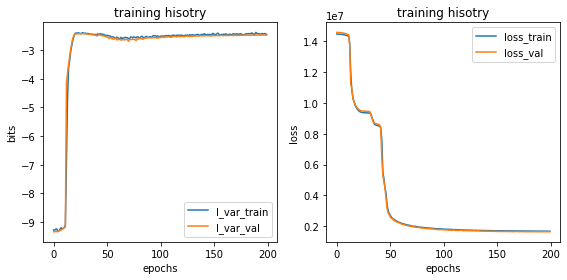

In [32]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [33]:
model.history['loss'][-1]/1e6

1.68530425

In [34]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [35]:
theta

array([[-0.14919733, -0.8643366 , -0.33347708, ..., -0.62595826,
        -0.81888515, -0.82225937],
       [-0.28593478, -0.53686357, -0.39831284, ..., -0.22401677,
        -0.59501725, -0.5029102 ],
       [-0.38030928, -0.9510707 , -0.13551815, ..., -0.47763625,
        -0.70909554, -0.5324549 ],
       ...,
       [-0.11281843, -0.46240723, -0.6182346 , ..., -0.2585942 ,
        -0.04681821, -0.2616344 ],
       [-0.51345104, -0.26653436, -0.22229722, ..., -0.24749523,
        -0.5133933 , -0.31479627],
       [ 0.3809327 ,  0.33898884,  0.01074918, ...,  0.3359782 ,
         0.10878538,  0.3566614 ]], dtype=float32)

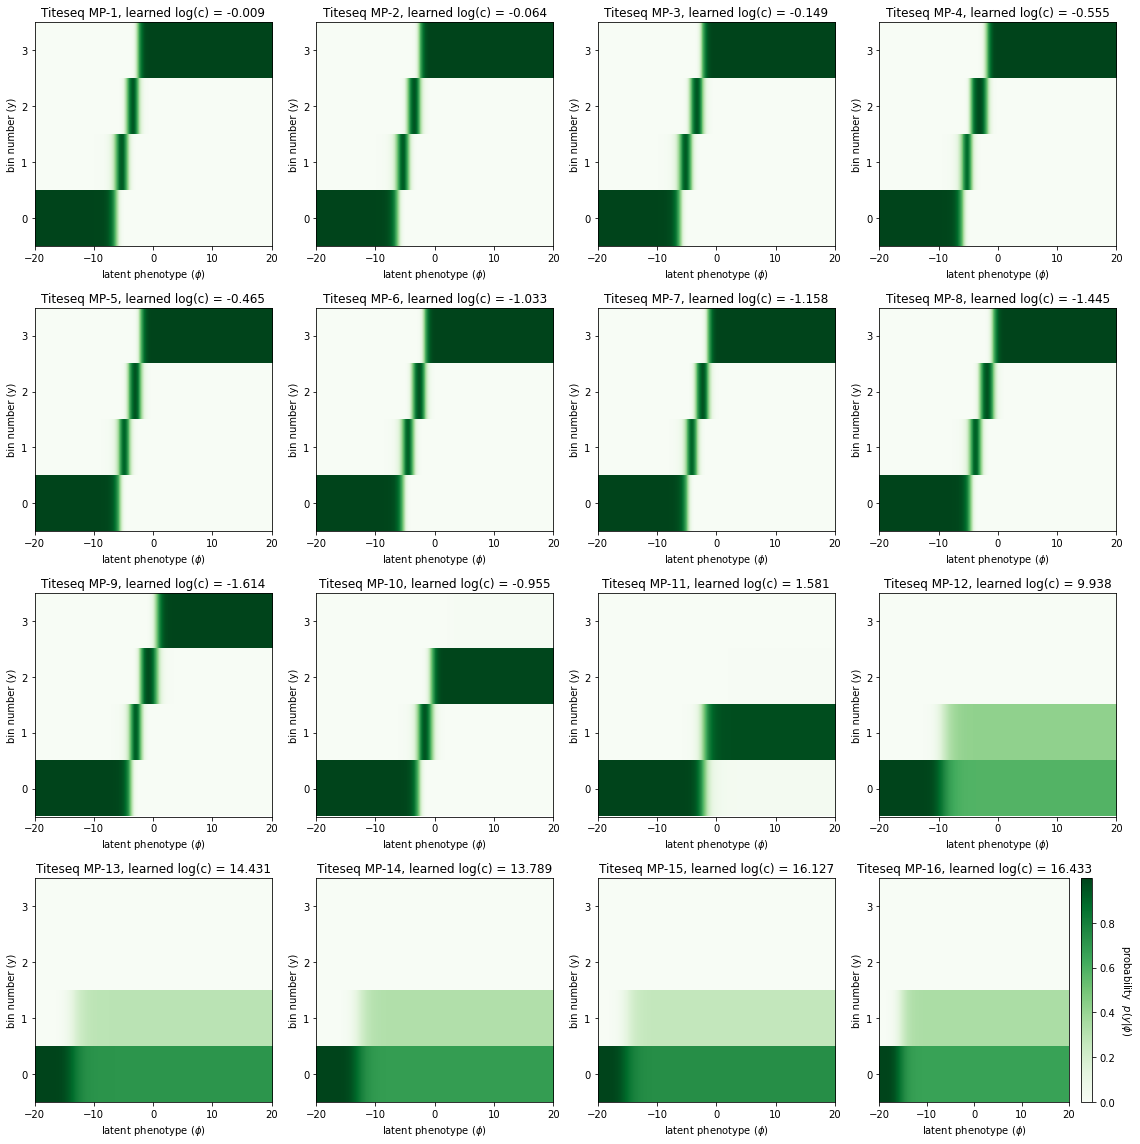

In [36]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-20, 20]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, learned log(c) = {(mp_list[mp_counter].get_weights()[0][0]):.3f}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig('ace2rbd_Titeseq_measurment_prcoess.png',dpi=300,bbox_inches='tight')


In [37]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [38]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [39]:
theta_df = pd.DataFrame(theta,columns=alphabet)

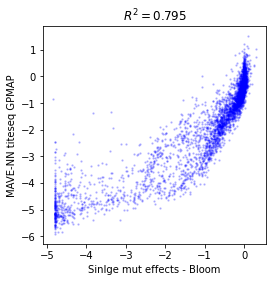

In [40]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [41]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

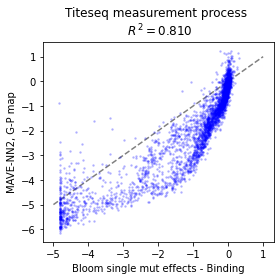

In [42]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

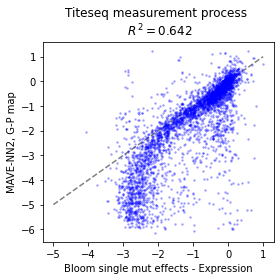

In [43]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

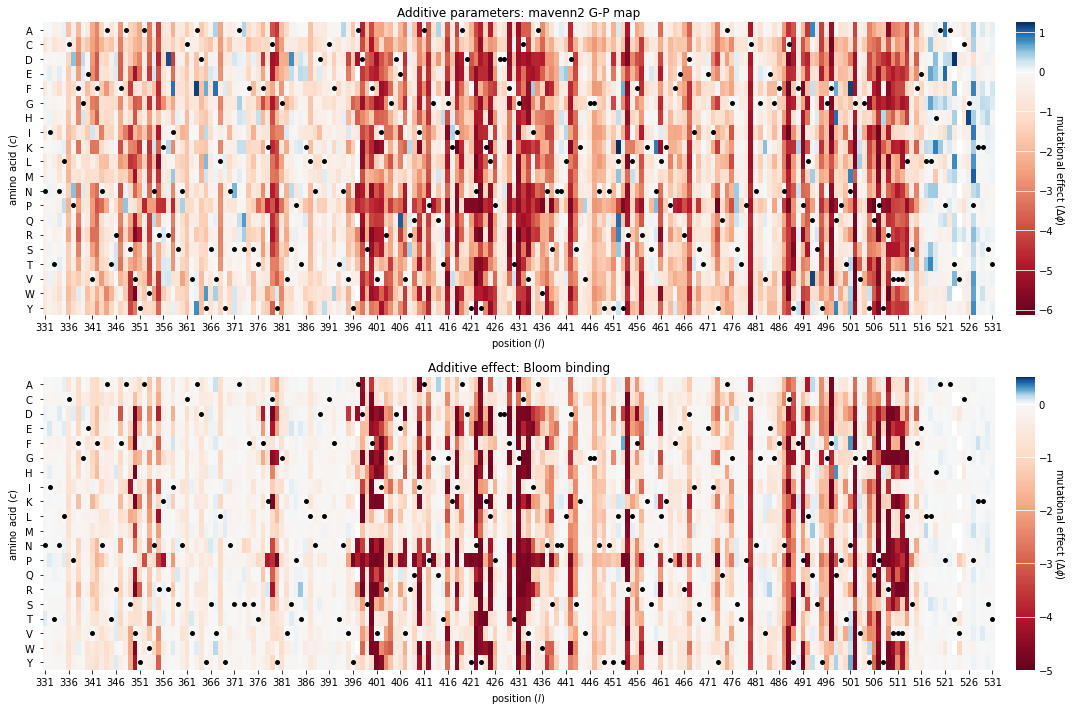

In [44]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [45]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')

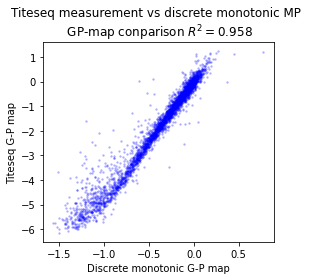

In [46]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Discrete monotonic G-P map')
plt.title(f'Titeseq measurement vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
plt.ylabel('Titeseq G-P map')
plt.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [47]:
#phi = gpmap.x_to_phi(x_test)

a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = np.exp(phi)
    B = np.exp(mu_neg)
    A = np.exp(a)
    
    mu_of_phi = np.log(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi
    
def Ka_of_c(c, 
            a=a,
            phi=phi,
            mu_neg=mu_neg):

    K_a_of_phi = np.exp(phi)
    B = np.exp(mu_neg)
    A = np.exp(a)
    
    mu_of_phi = np.log(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [48]:
#cs_that_worked = np.arange(0.1,1,0.06)/1000

In [49]:
learned_conc_list = []
for mp in mp_list:
    learned_conc_list.append(mp.get_weights()[0][0])
    
learned_conc_list = np.array(learned_conc_list)

In [50]:
learned_conc_grid = np.arange(min(learned_conc_list),max(learned_conc_list),0.05)

Text(0, 0.5, '$\\mu(\\phi)$')

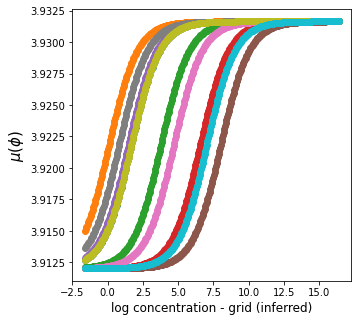

In [51]:
plt.figure(figsize=(5,5))

cs_ = np.arange(0.01,30,0.01)
cs_bloom = np.arange(10**(-13),10**(-3),10**(-8))

for _ in np.random.choice(np.arange(0,len(phi)),size=10):
    plt.plot(learned_conc_grid,mu_of_phi(c=np.exp(learned_conc_grid),phi=phi[_]),'o-')
    #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
plt.xlabel('log concentration - grid (inferred)',fontsize=12)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('$\mu(\phi)$',fontsize=15)
#plt.ylim(0,4)

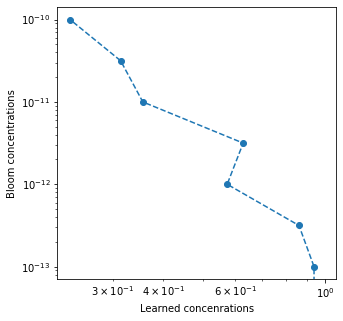

In [71]:
plt.figure(figsize=(5,5))
plt.plot(np.exp(learned_conc_list)[0:8],cs[0:8],'o--')
plt.xlabel('Learned concenrations')
plt.ylabel('Bloom concentrations')
plt.xscale('log')
plt.yscale('log')

In [60]:
learned_conc_list

array([-9.4532613e-03, -6.3991480e-02, -1.4927141e-01, -5.5545825e-01,
       -4.6499330e-01, -1.0328826e+00, -1.1584307e+00, -1.4447452e+00,
       -1.6142858e+00, -9.5543385e-01,  1.5805184e+00,  9.9377136e+00,
        1.4431454e+01,  1.3789418e+01,  1.6127178e+01,  1.6433231e+01],
      dtype=float32)